# Randomly select splits to keep in the model

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)

num_kept_neurons = 2
lr=0.005
runs=50

#0: loss: 0.03269129619002342 - size: 209
#1: loss: 0.0784241184592247 - size: 209
#2: loss: 0.04436294734477997 - size: 209
#3: loss: 0.029536718502640724 - size: 209
#4: loss: 0.051898784935474396 - size: 209
#5: loss: 0.02825162187218666 - size: 209
#6: loss: 0.06678327172994614 - size: 209
#7: loss: 0.07226479798555374 - size: 209
#8: loss: 0.05376538634300232 - size: 209
#9: loss: 0.03135215491056442 - size: 209
#10: loss: 0.058663975447416306 - size: 209
#11: loss: 0.03225056454539299 - size: 209
#12: loss: 0.030820244923233986 - size: 209
#13: loss: 0.03283119574189186 - size: 209
#14: loss: 0.04556238651275635 - size: 209
#15: loss: 0.043057966977357864 - size: 209
#16: loss: 0.033937834203243256 - size: 209
#17: loss: 0.04800791293382645 - size: 209
#18: loss: 0.06931739300489426 - size: 209
#19: loss: 0.033138737082481384 - size: 209
#20: loss: 0.05581457167863846 - size: 209
#21: loss: 0.03992612659931183 - size: 209
#22: loss: 0.03198038041591644 - size: 209
#23: loss: 0.14

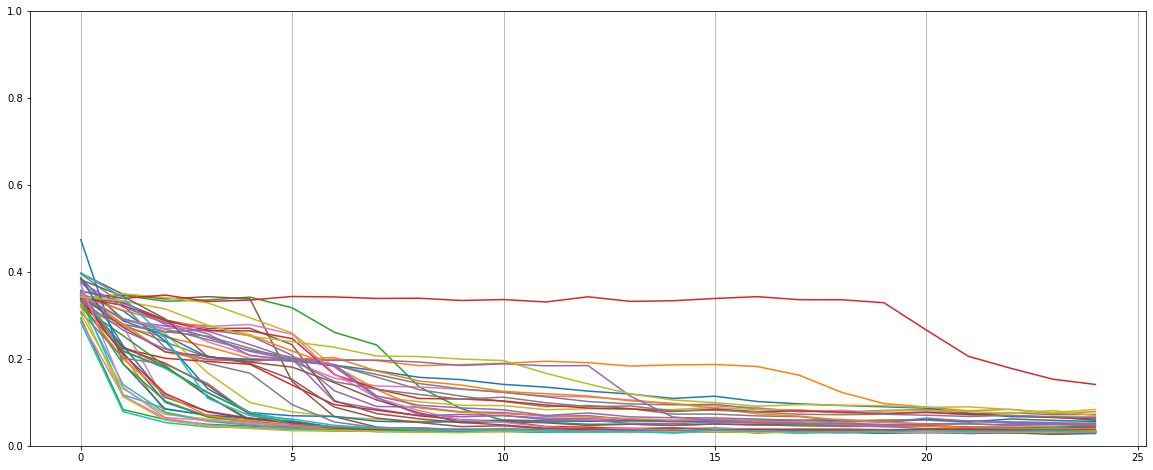

In [3]:
criterion = torch.nn.MSELoss()

def grow(model):
    new_neurons = model.grow(num_novel=4)
    
    model.tune_direction()
    model.tune_new_neurons()
            

    selected = [torch.randperm(n)[:num_kept_neurons] for n in new_neurons]

    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

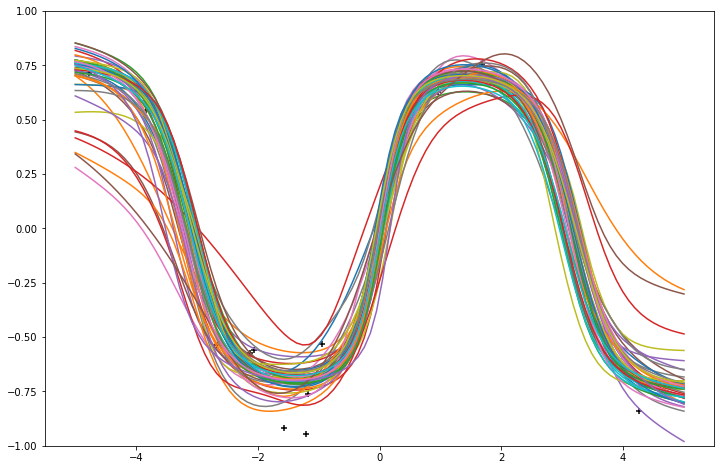

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'random_growth_tuned.pt')